# **Name: Ji Qi, Session: A1**

- **Forecasting Price Changes & Promotions** 

- **Dataset: jeans_data**

- **Background**: 
  - You are given the same dataset of prices for a pair of jeans from a medium sized fashion retailer in the southeast USA and their corresponding sales. The data is reported on a week-to-week basis. In addition to price as an input, you are also given a binary indicator variable (se_indicator) specifying whether a given week occurred during a special event (e.g., Christmas).

  - In the weekly historical data, there was an original retail price for the sales offered ($135) as well as two promotional prices: 15% off ($101.25) and 25% off ($114.75).In a previous analysis (see in-class example), the two 15% off and 25% off promotions that were already tested in stores was examined to see if they had a statistically significant effect. This was done by specifying the two promo prices as dummy variables, as follows:      
  
  - `𝑠𝑎𝑙𝑒𝑠= 𝛽0 + 𝛽1∗𝑝𝑟𝑜𝑚𝑜𝑡𝑖𝑜𝑛114 + 𝛽2∗𝑝𝑟𝑜𝑚𝑜𝑡𝑖𝑜𝑛101 + 𝛽3∗𝑠e_indicator + ε`

- **Goal**: 
  - they want you to predict the sales for a future week given you **offer promo (P): “$25 Off” (not 25% off) promotion specifically during a special event period**. 


# **Import required packages**

In [84]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# **Jeans dataset information**

In [85]:
# import dataset
dfjeans = pd.read_excel("jeans_data.xls")

In [86]:
# check whether type of each feature is as expected
dfjeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week           26 non-null     int64  
 1   sales          26 non-null     int64  
 2   price          26 non-null     float64
 3   special_event  4 non-null      object 
 4   se_indicator   26 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


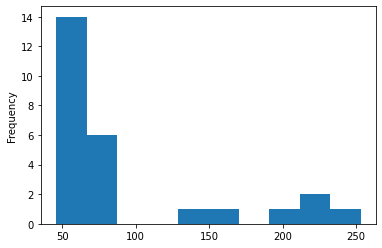

In [87]:
# histogram of sales
dfjeans["sales"].plot.hist()
plt.show()

In [88]:
# 6 instances of discounts
dfjeans.price.value_counts()

135.00    20
114.75     3
101.25     3
Name: price, dtype: int64

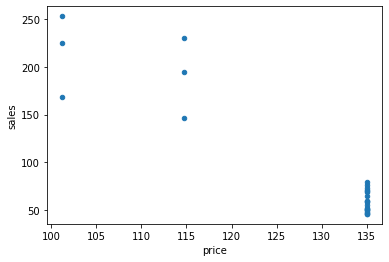

In [89]:
# sales price scatterplot
dfjeans.plot.scatter(x="price",y="sales")
plt.show()

In [90]:
# 4 special events
dfjeans.special_event.value_counts()

Presidents Day    1
Easter            1
Memorial Day      1
4th of July       1
Name: special_event, dtype: int64

In [91]:
# with large dataset, adding the dropna=False option might help
dfjeans.special_event.value_counts(dropna=False)

NaN               22
Presidents Day     1
Easter             1
Memorial Day       1
4th of July        1
Name: special_event, dtype: int64

# **Model I**: Price (in $) and special event indicator as an independent variable

In [92]:
# pick 'price' and 'se_indicator' as our independent variable
# add constant to feature matrix
X1 = sm.add_constant(dfjeans[["price","se_indicator"]])
X1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,price,se_indicator
0,1.0,114.75,1
1,1.0,135.00,0
2,1.0,135.00,0
3,1.0,135.00,0
4,1.0,135.00,0
5,1.0,114.75,1
6,1.0,135.00,0
7,1.0,135.00,0
8,1.0,135.00,0
9,1.0,114.75,0


In [93]:
# fit the OLS model
olsjeans_1 = sm.OLS(dfjeans.sales, X1).fit()

In [94]:
# results summary
# 96.3% of variance in dependent varibale could be explained by two independent varibales
# both coefficients of indicators are significant different at 5% level
olsjeans_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     295.4
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.96e-17
Time:                        05:20:05   Log-Likelihood:                -102.28
No. Observations:                  26   AIC:                             210.6
Df Residuals:                      23   BIC:                             214.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          509.0259     43.675     11.655      0.000     418.677     599.375
price           -3.3287      0.329    -10.123      0.000      -4.009      -2.648
se_indicator    76.2267     10.781      7.071      0.000      53.925      98.528
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.214
Skew:                           0.367   Prob(JB):                        0.545
Kurtosis:                       2.237   Cond. No.                     2.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# store residuals of the fit 
dfjeans["residual_1"] = olsjeans_1.resid

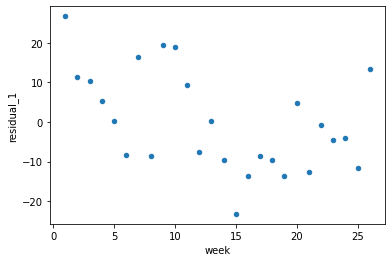

In [96]:
# plot residual against week
dfjeans.plot.scatter(x="week",y="residual_1")
plt.show()

### **Sales Prediction**: 219 pairs of jeans

- The sales prediction for next week are 219 pairs of jeans





In [97]:
# predict sales for a week in the future
Xnew = np.array([1,110,1])
olsjeans_1.predict(Xnew)[0]

219.09254461715582

In [98]:
print('The sales prediction for next week are {} pairs of jeans'.format(round(olsjeans_1.predict(Xnew)[0])))

The sales prediction for next week are 219 pairs of jeans


# **Model II**: Price (as a % discount off original price) and special event indicator as an independent variable

In [99]:
# add a new column % discount variable
dfjeans['discount'] = (1 - dfjeans['price'] / 135)

In [100]:
# add constant to feature matrix
X2 = sm.add_constant(dfjeans[["discount","se_indicator"]])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [101]:
# fit the OLS model
olsjeans_2 = sm.OLS(dfjeans.sales, X2).fit()

In [102]:
# results summary
# 96.3% of variance in dependent varibale could be explained by two independent varibales
# both coefficients of indicators are significant different at 5% level
olsjeans_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     295.4
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.96e-17
Time:                        05:20:06   Log-Likelihood:                -102.28
No. Observations:                  26   AIC:                             210.6
Df Residuals:                      23   BIC:                             214.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           59.6477      2.917     20.447      0.000      53.613      65.682
discount       449.3782     44.392     10.123      0.000     357.546     541.211
se_indicator    76.2267     10.781      7.071      0.000      53.925      98.528
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.214
Skew:                           0.367   Prob(JB):                        0.545
Kurtosis:                       2.237   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# store residuals of the fit 
dfjeans["residual_2"] = olsjeans_2.resid

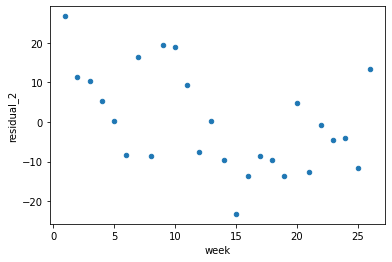

In [104]:
# plot residual against week
dfjeans.plot.scatter(x="week",y="residual_2")
plt.show()

### **Prediction**: 219 pairs of jeans

- The sales prediction for next week are 219 pairs of jeans

In [105]:
# predict sales for a week in the future
discount_new_week = round((1 - 110 / 135),3)
Xnew = np.array([1,discount_new_week,1])
olsjeans_2.predict(Xnew)[0]

219.0093264248705

In [106]:
print('The sales prediction for next week are {} pairs of jeans'.format(round(olsjeans_2.predict(Xnew)[0])))

The sales prediction for next week are 219 pairs of jeans


#**Conclusion**

Both Models result in almost the same prediction of sales around 219 pairs of jeans. The only difference between two models is that we only replace the 'price' variable with the 'discount' variable and keep others same. In fact, the 'discount' variable is another repsentation of the 'price' variable via the formula: `1 - New Price / Original Price`, which means that the relationships among the discount prices are still the same. Therefore, the prediction results are same for both models.